In [6]:
import tomotopy as tp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tp.isa)

avx2


In [3]:
file_path = "/Volumes/时伟SSD512G/中国扶贫20230210/0517清洗完成.csv"
df = pd.read_csv(file_path)  # 读取excel文件

In [4]:
df.head()

,Unnamed: 0,author.username,created_at,date,time,text,public_metrics.reply_count,public_metrics.retweet_count,public_metrics.quote_count,public_metrics.like_count,author.verified,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,entities.mentions,in_reply_to_username,retweeted_username,quoted_username
0,0,StigmabaseA,2013-01-01 01:05:59+00:00,2013/1/1,1:05:59,china chinese leader jinping urge local author...,0,0,0,0,False,2912,1263,1584654,NaN,NaN,NaN,NaN
1,1,WantChinaTimes,2013-01-01 03:45:03+00:00,2013/1/1,3:45:03,chinese leader stress eliminate poverty china,0,0,0,0,False,4091,534,50016,NaN,NaN,NaN,NaN
2,2,StigmabaseA,2013-01-01 07:05:04+00:00,2013/1/1,7:05:04,jinping urge great poverty alleviation effort ...,0,0,0,0,False,2912,1263,1584654,NaN,NaN,NaN,NaN
3,3,StigmabaseA,2013-01-01 08:06:17+00:00,2013/1/1,8:06:17,chinese leader stress eliminate poverty china ...,0,0,0,0,False,2912,1263,1584654,NaN,NaN,NaN,NaN
4,4,StigmabaseA,2013-01-01 08:41:02+00:00,2013/1/1,8:41:02,related china urge great poverty alleviation e...,0,0,0,0,False,2912,1263,1584654,NaN,NaN,NaN,NaN


In [11]:
def find_k(docs, min_k, max_k, min_df):
    # min_df 词语最少出现在2个文档中

    scores = []
    for k in range(min_k, max_k):
        # seed随机种子，保证在大邓这里运行结果与你运行的结果一样
        mdl = tp.LDAModel(min_df=min_df, k=k, rm_top=10, seed=1)
        for tweet in docs:
            mdl.add_doc(str(tweet).strip().split())
        for i in range(0, 100, 10):
            mdl.train(10)
        coh = tp.coherence.Coherence(mdl)
        scores.append(coh.get_score())

    # x = list(range(min_k, max_k - 1))  # 区间最右侧的值。注意：不能大于max_k
    # print(x)
    # print()
    plt.plot(range(min_k, max_k), scores)
    plt.xlabel("number of topics")
    plt.ylabel("coherence")
    plt.show()

/var/folders/db/_f_9t_hx60d5s79wfdtpw0780000gn/T/ipykernel_2048/3943222040.py:11: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  mdl.train(10)


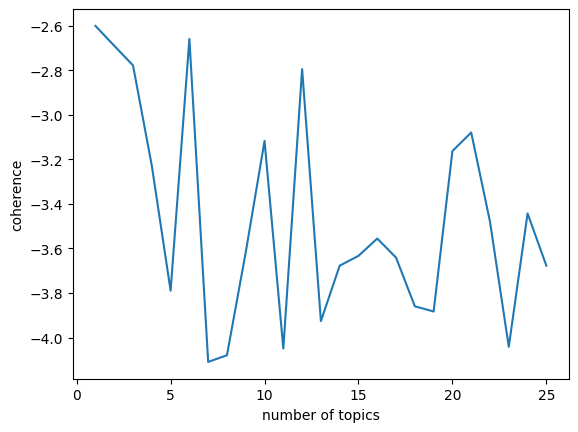

In [12]:
find_k(docs=df["text"], min_k=1, max_k=26, min_df=2)

In [24]:
# 初始化LDA
mdl = tp.LDAModel(k=6, rm_top=10, min_df=2, seed=555)
for tweet in df["text"]:
    mdl.add_doc(
        str(tweet).strip().split()
    )  # 传入的是一个一个的词['today','is','a','nice','day','and','I', 'love','you']

In [ ]:
# 训练
for i in range(0, 510, 10):
    mdl.train(10)
    print("Iteration: {}\tLog-likelihood: {}".format(i, mdl.ll_per_word))

In [26]:
# 查看每个topic feature words
for k in range(mdl.k):
    print("Top 10 words of topic #{}".format(k))
    print(mdl.get_topic_words(k, top_n=10))
    print("##**" * 25)

Top 10 words of topic #0
[('xinjiang', 0.009328668937087059), ('relief', 0.009245608001947403), ('province', 0.00873985979706049), ('village', 0.00775051349774003), ('region', 0.00740535045042634), ('county', 0.00730383163318038), ('poor', 0.007170934230089188), ('area', 0.007039882708340883), ('help', 0.006938363891094923), ('rural', 0.006866377778351307)]
##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**
Top 10 words of topic #1
[('pakistan', 0.017187662422657013), ('export', 0.014607394114136696), ('nigeria', 0.012834124267101288), ('cpec', 0.009822042658925056), ('good', 0.008515981025993824), ('economic', 0.00834608729928732), ('development', 0.007836404256522655), ('great', 0.007425826508551836), ('cooperation', 0.0074045900255441666), ('human', 0.00725947180762887)]
##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**##**
Top 10 words of topic #2
[('global', 0.024098049849271774), ('po

In [27]:
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.4)
| 193279 docs, 2944892 words
| Total Vocabs: 34128, Used Vocabs: 21780
| Entropy of words: 7.73297
| Entropy of term-weighted words: 7.73297
| Removed Vocabs: poverty china alleviation people chinese reduction country eliminate reduce year
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -7.42541
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 2 (minimum document frequency of words)
| rm_top: 10 (the number of top words to be removed)
| k: 6 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 555 (random seed)
| trained in version 0.12.4
|
<Parameters>
| al

In [32]:
topic_df = pd.DataFrame(topic_list)
topic_df

,0,1,2,3,4,5,6,7,8,9
0,"(xinjiang, 0.009328668937087059)","(relief, 0.009245608001947403)","(province, 0.00873985979706049)","(village, 0.00775051349774003)","(region, 0.00740535045042634)","(county, 0.00730383163318038)","(poor, 0.007170934230089188)","(area, 0.007039882708340883)","(help, 0.006938363891094923)","(rural, 0.006866377778351307)"
1,"(pakistan, 0.017187662422657013)","(export, 0.014607394114136696)","(nigeria, 0.012834124267101288)","(cpec, 0.009822042658925056)","(good, 0.008515981025993824)","(economic, 0.00834608729928732)","(development, 0.007836404256522655)","(great, 0.007425826508551836)","(cooperation, 0.0074045900255441666)","(human, 0.00725947180762887)"
2,"(global, 0.024098049849271774)","(population, 0.0141257643699646)","(world, 0.013912508264183998)","(bank, 0.011282342486083508)","(since, 0.010850751772522926)","(extreme, 0.009408731013536453)","(1980, 0.008484618738293648)","(foundation, 0.007687445264309645)","(emission, 0.007210156414657831)","(tibet, 0.0071238381788134575)"
3,"(development, 0.012036171741783619)","(say, 0.010405288077890873)","(eradication, 0.009662900120019913)","(president, 0.00850588083267212)","(jinping, 0.006922383792698383)","(2020, 0.006739419419318438)","(relief, 0.006316890008747578)","(extreme, 0.0060694278217852116)","(effort, 0.0060088783502578735)","(world, 0.005958859343081713)"
4,"(million, 0.026757169514894485)","(lift, 0.02540799044072628)","(world, 0.013951124623417854)","(extreme, 0.011948087252676487)","(rural, 0.011664217337965965)","(100, 0.010216161608695984)","(project, 0.009817468002438545)","(2020, 0.009712212719023228)","(area, 0.008764916099607944)","(poor, 0.008340706117451191)"
5,"(poor, 0.01026984490454197)","(india, 0.009395142085850239)","(million, 0.00881983432918787)","(world, 0.008042581379413605)","(africa, 0.0069295368157327175)","(global, 0.0069260140880942345)","(capitalism, 0.006414107512682676)","(extreme, 0.005916290450841188)","(help, 0.005254099145531654)","(anti, 0.005189523566514254)"
